# Lab: Seaborn

Seaborn is another plotting library. Some consider it the [`ggplot`](https://ggplot2.tidyverse.org/) of Python with excellent default setting which make your data life easier. There is rather good [documentation online](https://seaborn.pydata.org/) and it comes with Anaconda Python.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

We can load and create the same plots as before.

In [2]:
office_df = pd.read_csv('data/raw/office_ratings.csv', encoding='UTF-8')
office_df.head()

,season,episode,title,imdb_rating,total_votes,air_date
0,1,1,Pilot,7.6,3706,2005-03-24
1,1,2,Diversity Day,8.3,3566,2005-03-29
2,1,3,Health Care,7.9,2983,2005-04-05
3,1,4,The Alliance,8.1,2886,2005-04-12
4,1,5,Basketball,8.4,3179,2005-04-19


/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

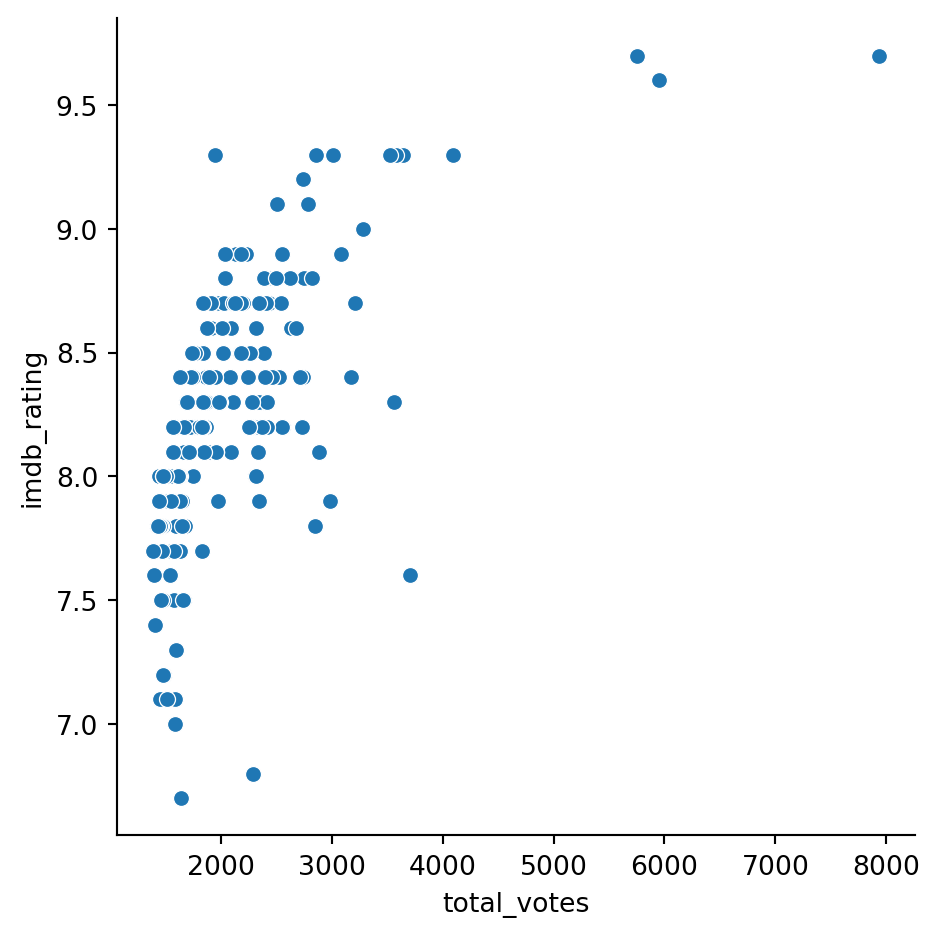

In [3]:
sns.relplot(x='total_votes', y='imdb_rating', data=office_df)

/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

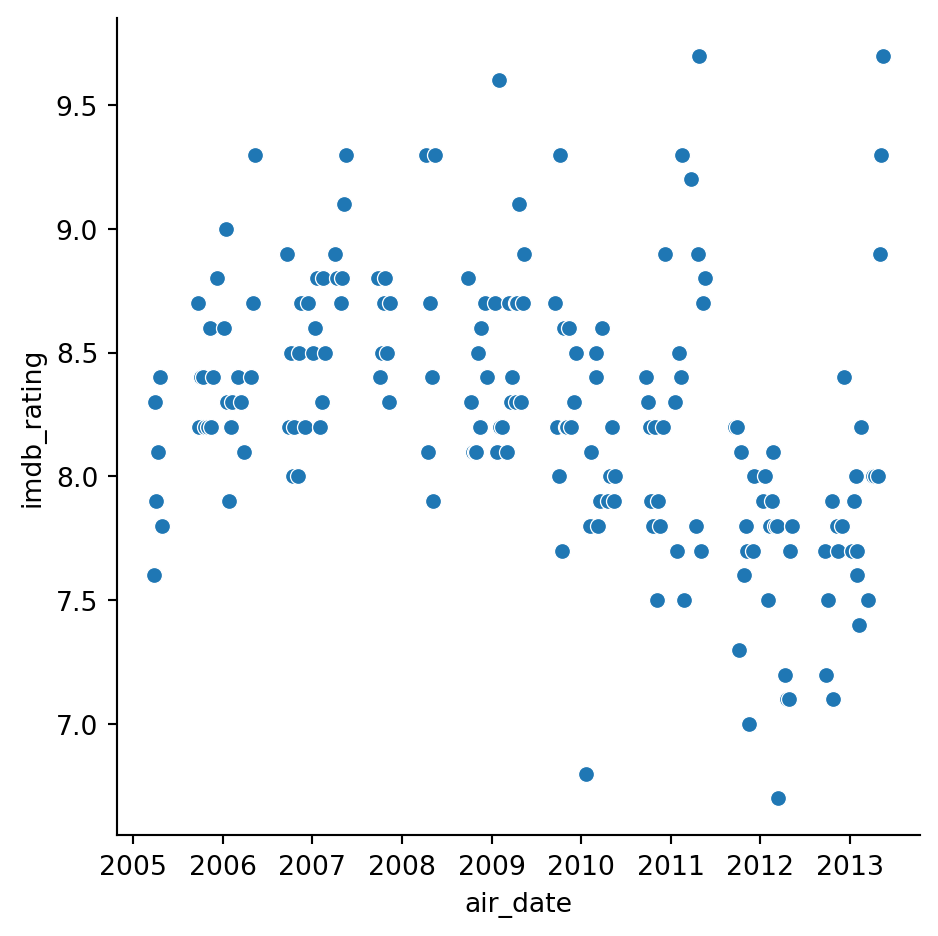

In [4]:
office_df['air_date'] =  pd.to_datetime(office_df['air_date'], errors='ignore')

g = sns.relplot(x="air_date", y="imdb_rating", kind="scatter", data=office_df)

## Functions

We can define our own functions. A function helps us with code we are going to run multiple times. For instance, the below function scales values between 0 and 1.

Here is a modified function from [stackoverflow](https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame).

In [5]:
office_df.head()

,season,episode,title,imdb_rating,total_votes,air_date
0,1,1,Pilot,7.6,3706,2005-03-24
1,1,2,Diversity Day,8.3,3566,2005-03-29
2,1,3,Health Care,7.9,2983,2005-04-05
3,1,4,The Alliance,8.1,2886,2005-04-12
4,1,5,Basketball,8.4,3179,2005-04-19


In [6]:
def normalize(df, feature_name):
    result = df.copy()
    
    max_value = df[feature_name].max()
    min_value = df[feature_name].min()
    
    result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    
    return result

Passing the dataframe and name of the column will return a dataframe with that column scaled between 0 and 1.

In [7]:
normalize(office_df, 'imdb_rating')

,season,episode,title,imdb_rating,total_votes,air_date
0,1,1,Pilot,0.300000,3706,2005-03-24
1,1,2,Diversity Day,0.533333,3566,2005-03-29
2,1,3,Health Care,0.400000,2983,2005-04-05
3,1,4,The Alliance,0.466667,2886,2005-04-12
4,1,5,Basketball,0.566667,3179,2005-04-19
...,...,...,...,...,...,...
183,9,19,Stairmageddon,0.433333,1484,2013-04-11
184,9,20,Paper Airplane,0.433333,1482,2013-04-25
185,9,21,Livin' the Dream,0.733333,2041,2013-05-02
186,9,22,A.A.R.M.,0.866667,2860,2013-05-09


Replacing the origonal dataframe. We can normalize both out votes and rating.

In [8]:
office_df = normalize(office_df, 'imdb_rating')

In [9]:
office_df = normalize(office_df, 'total_votes')

In [10]:
office_df

,season,episode,title,imdb_rating,total_votes,air_date
0,1,1,Pilot,0.300000,0.353616,2005-03-24
1,1,2,Diversity Day,0.533333,0.332212,2005-03-29
2,1,3,Health Care,0.400000,0.243082,2005-04-05
3,1,4,The Alliance,0.466667,0.228253,2005-04-12
4,1,5,Basketball,0.566667,0.273047,2005-04-19
...,...,...,...,...,...,...
183,9,19,Stairmageddon,0.433333,0.013912,2013-04-11
184,9,20,Paper Airplane,0.433333,0.013606,2013-04-25
185,9,21,Livin' the Dream,0.733333,0.099067,2013-05-02
186,9,22,A.A.R.M.,0.866667,0.224278,2013-05-09


Seaborn prefers a long format table. Details of melt can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html).

In [11]:
office_df_long=pd.melt(office_df, id_vars=['season', 'episode', 'title', 'air_date'], value_vars=['imdb_rating', 'total_votes'])
office_df_long

,season,episode,title,air_date,variable,value
0,1,1,Pilot,2005-03-24,imdb_rating,0.300000
1,1,2,Diversity Day,2005-03-29,imdb_rating,0.533333
2,1,3,Health Care,2005-04-05,imdb_rating,0.400000
3,1,4,The Alliance,2005-04-12,imdb_rating,0.466667
4,1,5,Basketball,2005-04-19,imdb_rating,0.566667
...,...,...,...,...,...,...
371,9,19,Stairmageddon,2013-04-11,total_votes,0.013912
372,9,20,Paper Airplane,2013-04-25,total_votes,0.013606
373,9,21,Livin' the Dream,2013-05-02,total_votes,0.099067
374,9,22,A.A.R.M.,2013-05-09,total_votes,0.224278


Which we can plot in seaborn like so.

/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

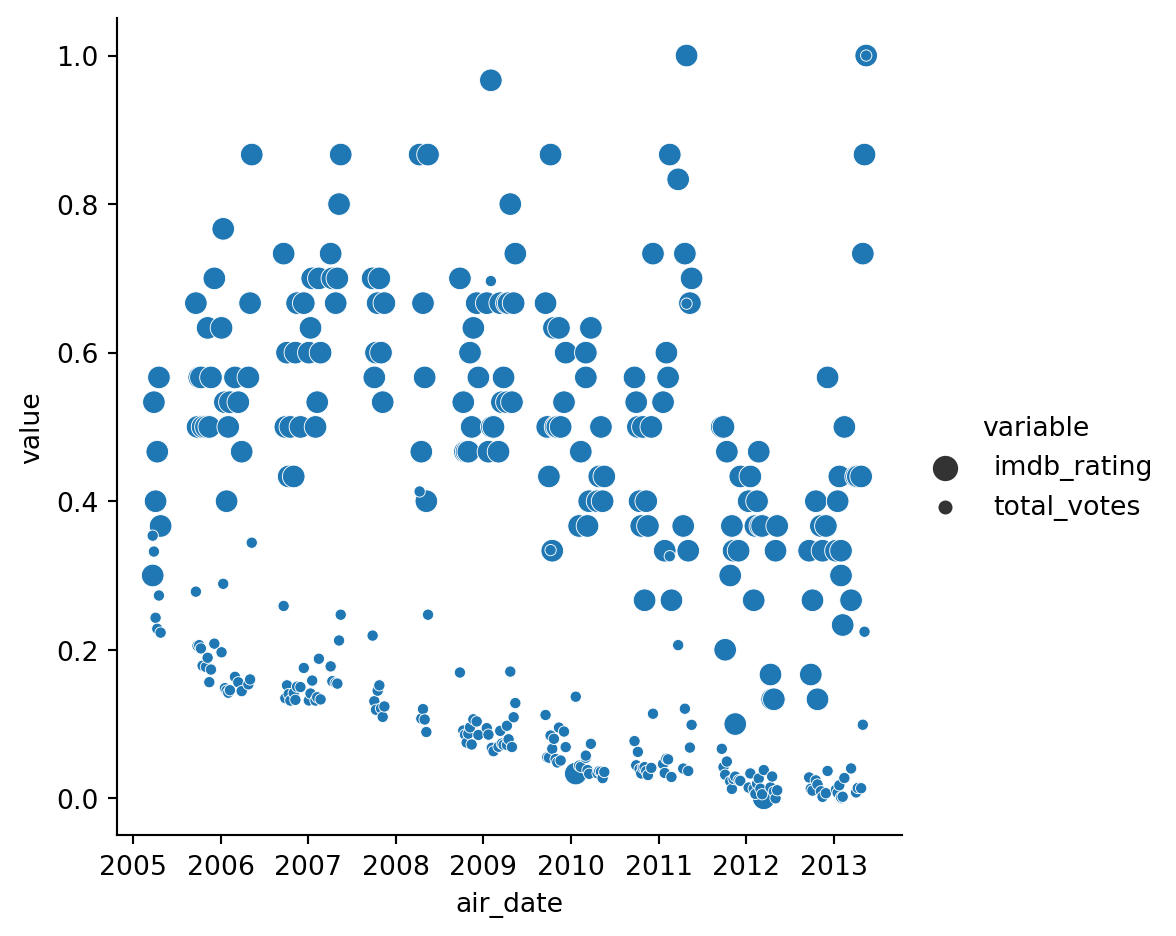

In [12]:
sns.relplot(x='air_date', y='value', size='variable', data=office_df_long)

In [13]:
?sns.relplot